In [35]:
import numpy as np
import cv2
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.figure
from matplotlib import mlab
import os
import json
import sys 

In [36]:
numbersFile = "../Logs/faceCounts.pk"
visitedList = "../Logs/faceCounted.data"

In [37]:
lists = []
infile = open(numbersFile, 'r')
while 1:
    try:
        lists.append(pickle.load(infile))
    except (EOFError):
        break
infile.close()

In [38]:
print lists[10]

1283586104754855936,195,61,0,79


In [39]:
PostID = np.zeros((len(lists),1) , dtype='i8')
posts = []
totFrames = np.zeros((len(lists),1) , dtype='i8')
faceFrames = np.zeros((len(lists),1) , dtype='i8')
profileFrames = np.zeros((len(lists),1) , dtype='i8')
frontalFrames = np.zeros((len(lists),1) , dtype='i8')
for i in range(len(lists)):
    log = lists[i].split(',')
    PostID[i] = int(log[0])
    posts.append(int(log[0]))
    totFrames[i] = int(log[1])
    faceFrames[i] = int(log[2])
    frontalFrames[i] = int(log[3])
    profileFrames[i] = int(log[3])

print PostID.shape

(9647, 1)


In [40]:
facePercentages = np.zeros((len(PostID),1))
percentages = np.zeros((len(PostID),1))
frontalPercentages = np.zeros((len(PostID),1))
profilePercentages = np.zeros((len(PostID),1))
for i in range(len(PostID)):
    facePercentages[i] = float(float(faceFrames[i])/float(totFrames[i]))
    percentages[i] = float(max(frontalFrames[i],profileFrames[i])/float(totFrames[i]))
    frontalPercentages[i] = float(frontalFrames[i])/float(totFrames[i])
    profilePercentages[i] = float(profileFrames[i])/float(totFrames[i])

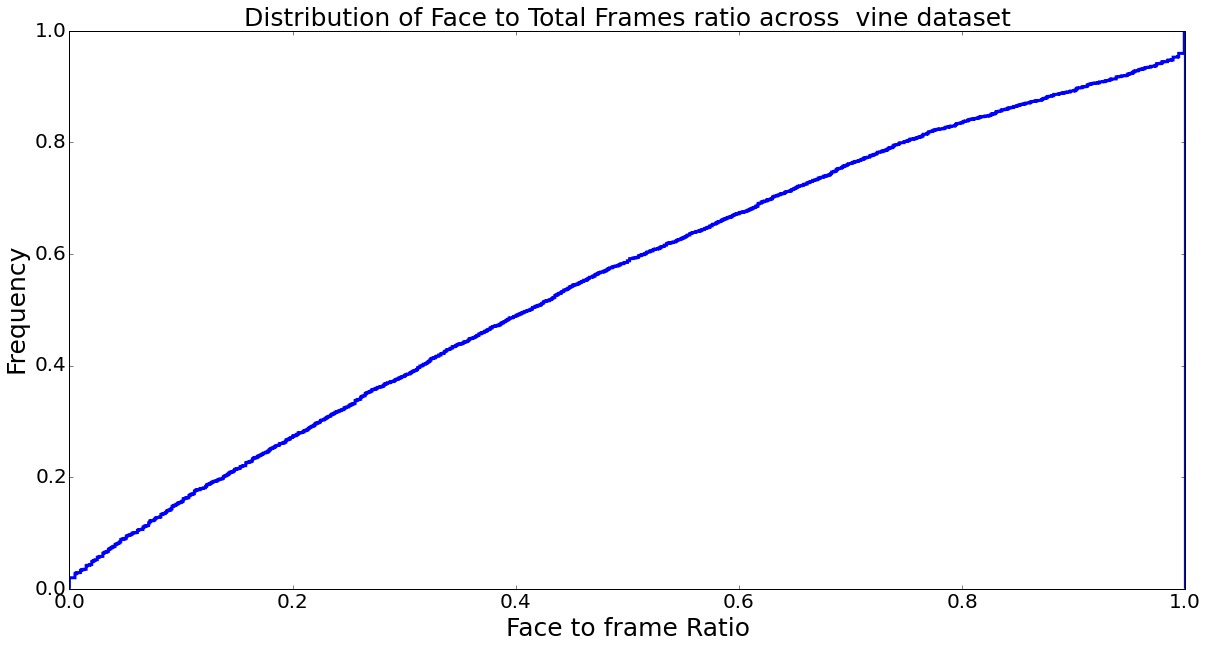

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(facePercentages , 1000 , normed =1 , histtype='step' , cumulative=True ,linewidth = 3.0)
plt.title("Distribution of Face to Total Frames ratio across  vine dataset",fontsize = 25)
plt.xlabel("Face to frame Ratio",fontsize = 25)
plt.ylabel("Frequency",fontsize = 25)
plt.show()


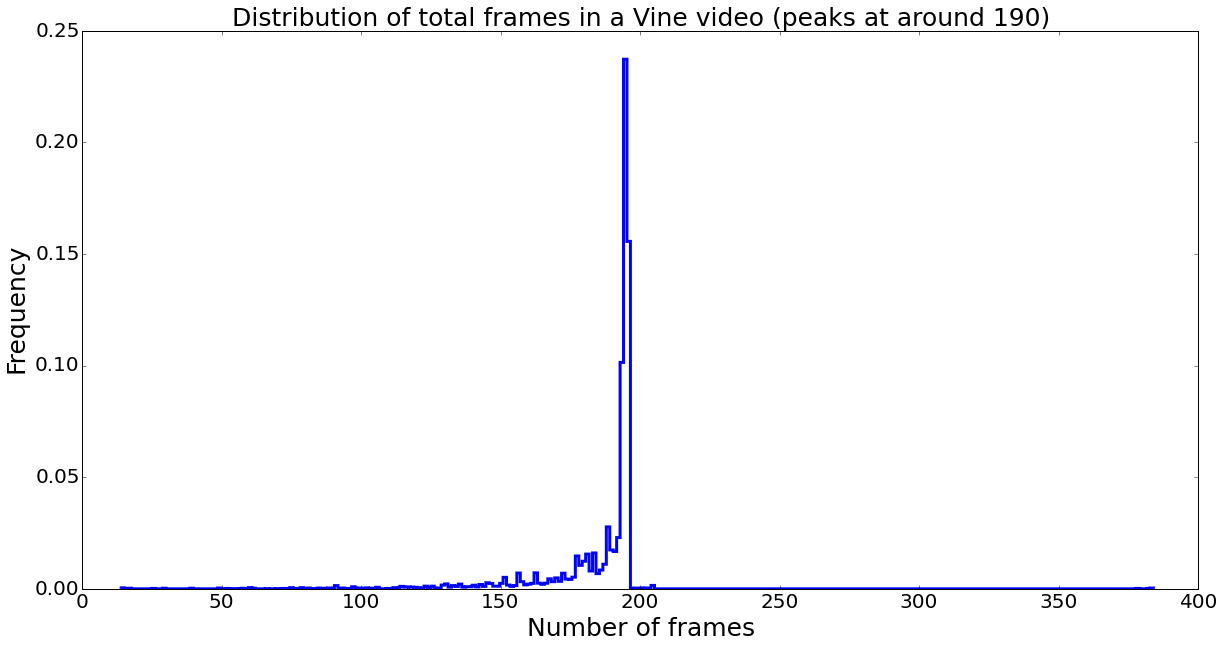

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(totFrames , 300 , normed =1 , histtype='step' , cumulative=False ,linewidth = 3.0)
plt.title("Distribution of total frames in a Vine video (peaks at around 190)",fontsize = 25)
plt.xlabel("Number of frames",fontsize = 25)
plt.ylabel("Frequency",fontsize = 25)
plt.show()


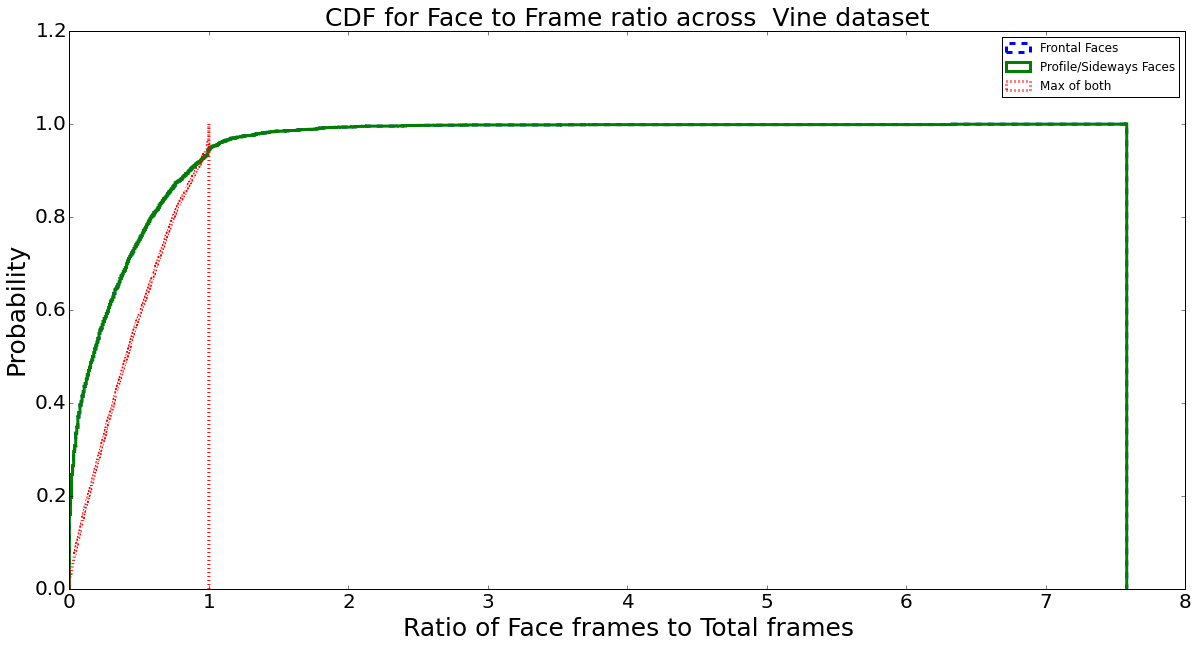

In [43]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(frontalPercentages, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
plt.hist(profilePercentages, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.hist(facePercentages, 1000, normed=1,histtype='step', cumulative=True, linewidth = 3.0,linestyle='dotted')
plt.title("CDF for Face to Frame ratio across  Vine dataset", fontsize = 25)
plt.xlabel("Ratio of Face frames to Total frames",fontsize = 25)
plt.ylabel("Probability",fontsize = 25)
plt.legend(['Frontal Faces', 'Profile/Sideways Faces' , 'Max of both'])
plt.show()


In [44]:
print np.mean(facePercentages)
print np.median(facePercentages)
print np.var(facePercentages)
print np.mean(frontalPercentages)
print np.median(frontalPercentages)
print np.var(frontalPercentages)
print np.mean(profilePercentages)
print np.median(profilePercentages)
print np.var(profilePercentages)

0.4459508785
0.413265306122
0.0917226150482
0.331112841537
0.174358974359
0.228694754072
0.331112841537
0.174358974359
0.228694754072


In [45]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    f = open(rootDir + '/popular.json' ,'r')
    data = json.load(f)
    return data

    
    
def getPopularPosts(popular , loopThreshold):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

def getRecords(popular):
    records = popular['data']['records']
    return records

In [46]:
root = "../vinedata/Data/"
dirs,files = walkLevel1Dir(root)
visited = getVisited()
selectedPosts = []
allPosts = []


for d in dirs:
    if d in visited:
        dataRoot = root + d
        print "Visiting: " + dataRoot
        popular = getPopularFile(dataRoot)
        popposts = getPopularPosts(popular , 1000)
        selectedPosts += popposts
        rec = getRecords(popular)
        allPosts += rec
        #


Visiting: ../vinedata/Data/1449016201
Visiting: ../vinedata/Data/1448816402
Visiting: ../vinedata/Data/1448854202
Visiting: ../vinedata/Data/1449057602
Visiting: ../vinedata/Data/1448942401
Visiting: ../vinedata/Data/1448951401
Visiting: ../vinedata/Data/1451412008
Visiting: ../vinedata/Data/1448762402
Visiting: ../vinedata/Data/1450256408
Visiting: ../vinedata/Data/1448775001
Visiting: ../vinedata/Data/1448769601
Visiting: ../vinedata/Data/1449127802
Visiting: ../vinedata/Data/1451260803
Visiting: ../vinedata/Data/1449025201
Visiting: ../vinedata/Data/1449043201
Visiting: ../vinedata/Data/1448737202
Visiting: ../vinedata/Data/1448865003
Visiting: ../vinedata/Data/1448650072
Visiting: ../vinedata/Data/1450364402
Visiting: ../vinedata/Data/1451282402
Visiting: ../vinedata/Data/1449072002
Visiting: ../vinedata/Data/1450418401
Visiting: ../vinedata/Data/1449052202
Visiting: ../vinedata/Data/1448982002
Visiting: ../vinedata/Data/1450440001
Visiting: ../vinedata/Data/1449000002
Visiting: ..

In [47]:
print len(selectedPosts)
print len(allPosts)

5396
14855


In [48]:
selectedIDs = np.zeros((len(selectedPosts),1),dtype='i8')
for i in range(len(selectedPosts)):
    selectedIDs[i] = int(selectedPosts[i]['postId'])

In [49]:
likeCount = np.zeros((len(allPosts),1))
repostCount = np.zeros((len(allPosts),1))
for i in range(len(allPosts)):
    likeCount[i] = allPosts[i]['likes']['count']
    repostCount[i] = allPosts[i]['reposts']['count']


In [50]:
print likeCount.shape

(14855, 1)


In [51]:
#test = np.random.gamma(0.1, 5, 1000)
test = np.random.exponential(0.15, 6541)
test = test * 30000

In [52]:
print test [999]
print test.max() , test.min()

1518.06944397
43627.7318679 1.16056458872


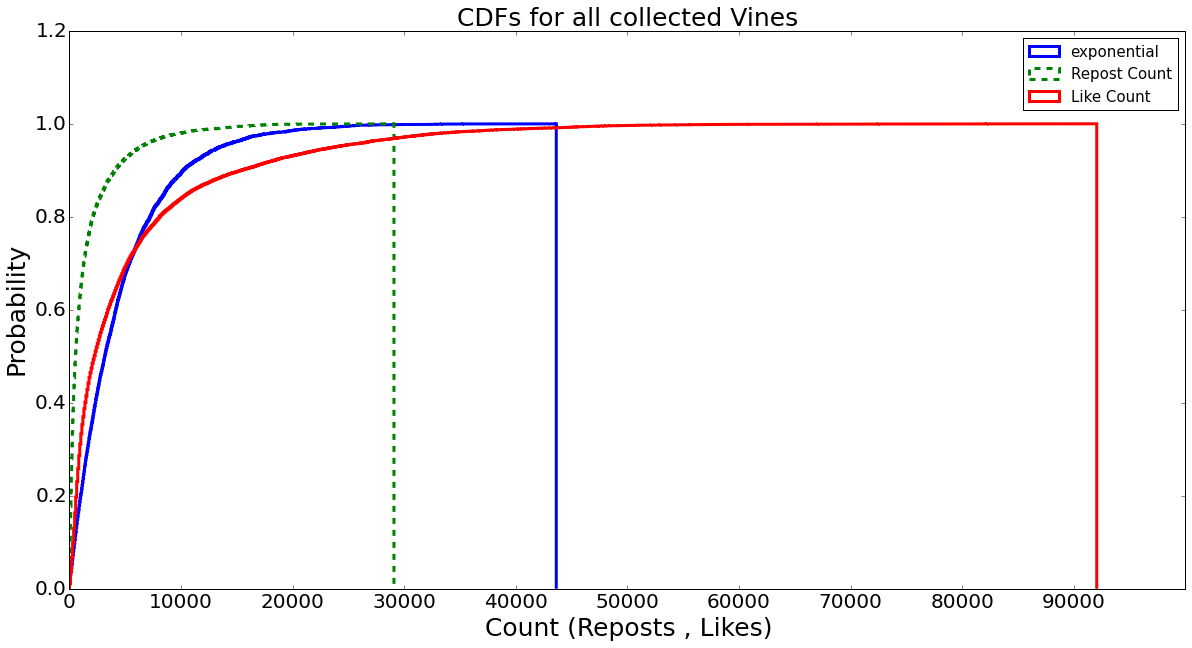

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(test , 1000 , normed =1 , histtype='step' , cumulative=True , linewidth = 3.0,)
plt.hist(repostCount , 1000 , normed =1 , histtype='step' , cumulative=True , linewidth = 3.0,linestyle='dashed')
plt.hist(likeCount , 1000 , normed =1 , histtype='step' , cumulative=True, linewidth = 3.0)
plt.xticks(np.arange(0, max(likeCount), 10000))
plt.title("CDFs for all collected Vines" , fontsize = 25)
plt.xlabel("Count (Reposts , Likes)" , fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.legend(['exponential','Repost Count', 'Like Count'] , fontsize = 15)
plt.show()

print np.mean(likeCount)
print np.median(likeCount)
print np.mean(repostCount)
print np.median(repostCount)

In [54]:
intersection = np.in1d(selectedIDs, PostID )
# indices = []
# for p in selectedPosts:
#     for i in range(len(posts)):
#         if p['postId'] in posts:
#             indices.append(posts.index(p['postId']))
#             break

indices = []
for i in range(len(intersection)):
    if(intersection[i]):
        indices.append(i)

#print indices

In [55]:
print len(selectedPosts)
print len(indices)
print PostID.shape
print selectedIDs.shape

5396
5114
(9647, 1)
(5396, 1)


In [60]:

selPercentages = np.zeros((len(indices),1))
selFrontalPercentages = np.zeros((len(indices),1))
selProfilePercentages = np.zeros((len(indices),1))

for i in range(len(indices)):
    selPercentages[i] = facePercentages[i]
    selProfilePercentages[i] = float(profileFrames[i])/float(totFrames[indices[i]])
    selFrontalPercentages[i] = float(faceFrames[i])/float(totFrames[indices[i]])

selRepost = np.zeros((len(indices),1))
selLikes = np.zeros((len(indices),1))

for i in range(len(indices)):
    selRepost[i] = allPosts[indices[i]]['reposts']['count']
    selLikes[i] = allPosts[indices[i]]['likes']['count']

In [61]:
print min(selRepost)
print min(selLikes)


[ 0.]
[ 18.]


In [62]:
likesNormed = selLikes / selLikes.max(axis=0)
repostNormed = selRepost / selRepost.max(axis=0)

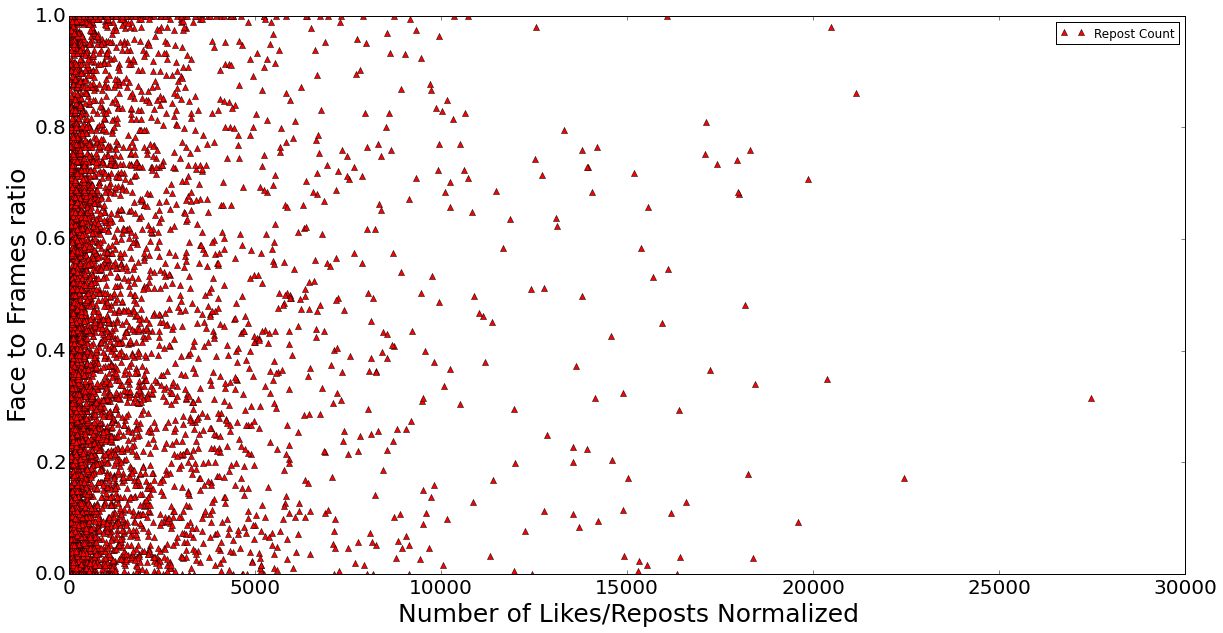

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#plt.plot(likesNormed , selPercentages,'*g' )
plt.plot(selRepost , selPercentages , '^r' )

plt.xlabel('Number of Likes/Reposts Normalized',fontsize = 25)
plt.ylabel('Face to Frames ratio', fontsize = 25)
plt.legend(['Repost Count'])
plt.show()

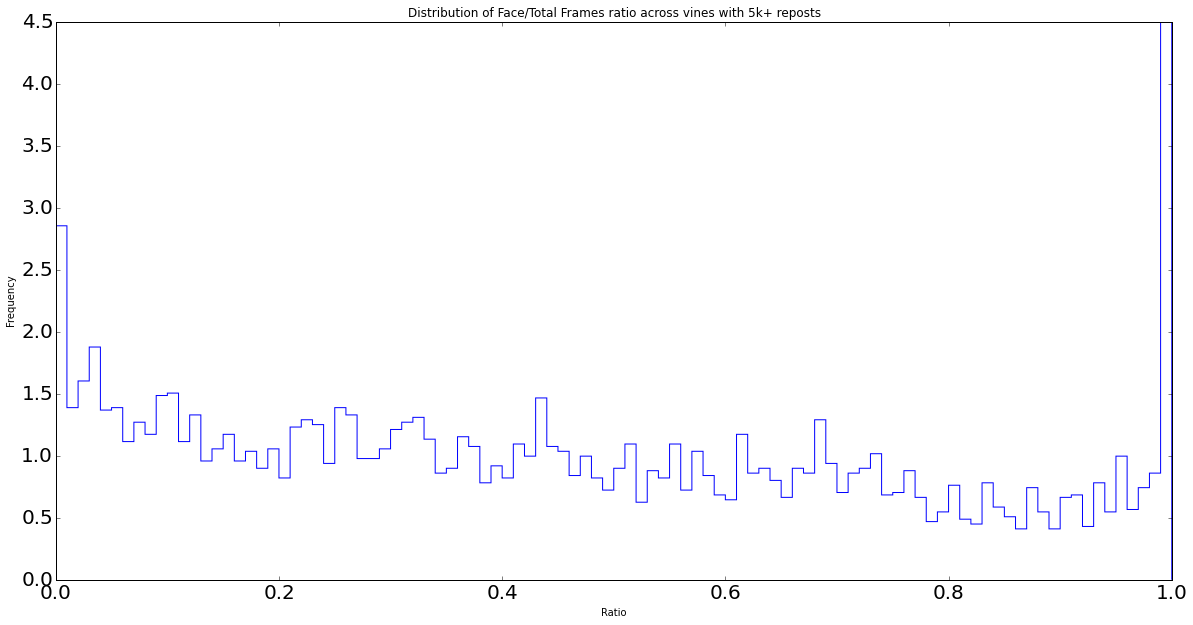

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(selPercentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across vines with 5k+ reposts")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.show()


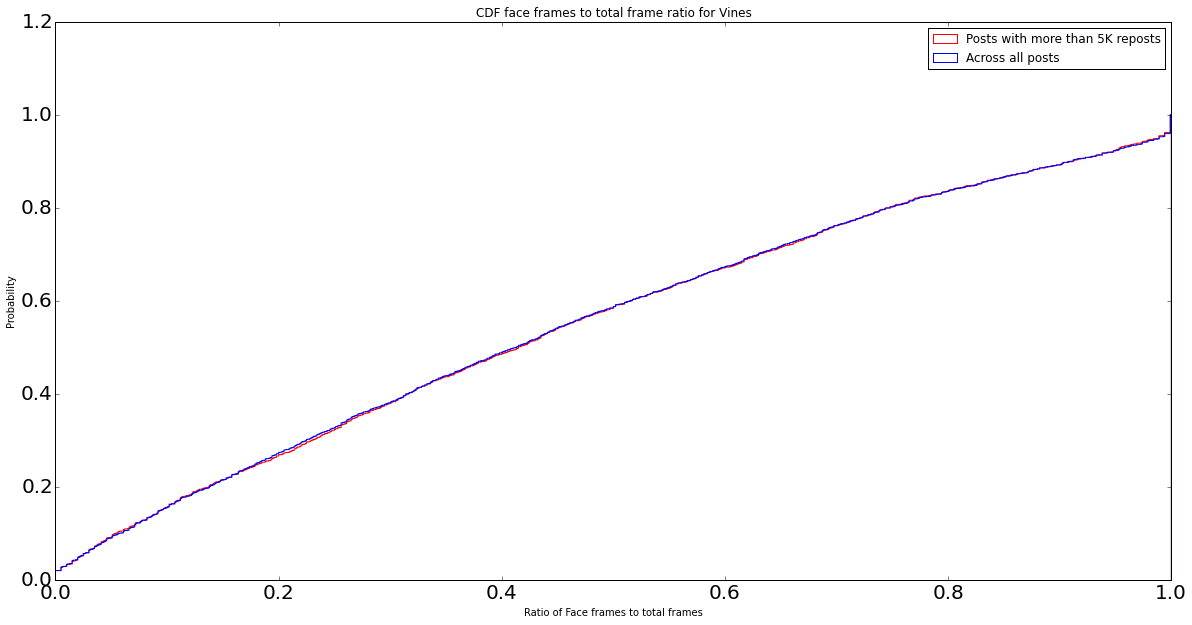

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
hist1 = plt.hist(selPercentages, 1000, normed=1,histtype='step', cumulative=True ,color='r')
hist2 = plt.hist(facePercentages, 1000, normed=1,histtype='step', cumulative=True , color='b')


plt.title("CDF face frames to total frame ratio for Vines")
plt.xlabel("Ratio of Face frames to total frames")
plt.ylabel("Probability")
plt.legend(['Posts with more than 5K reposts', 'Across all posts'])
plt.show()

In [ ]:
print np.mean(selPercentages)
print np.median(selPercentages)
print np.var(selPercentages)